In [1]:
import os
from pathlib import Path
import ast

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import utils

In [2]:
data_dir = '/Users/rebekahzhang/data/neural_data'
pickle_dir = Path(os.path.join(data_dir, 'session_pickles'))

# filter sessions based on performance

In [3]:
sessions_all_raw = pd.read_csv(os.path.join(data_dir, 'sessions_official_raw.csv'), index_col=0)

In [4]:
# cohort5 = ['RZ034', 'RZ036', 'RZ037', 'RZ038', 'RZ039']
# cohort6 = ['RZ047', 'RZ049','RZ050', 'RZ051', 'RZ052', 'RZ053', 'RZ055']
# cohort7 = ['RZ057', 'RZ058','RZ059', 'RZ061', 'RZ062', 'RZ063', 'RZ065', 'RZ068', 'RZ070']

# sessions_cohort5 = sessions_all_raw[sessions_all_raw['mouse'].isin(cohort5)]
# sessions_cohort6 = sessions_all_raw[sessions_all_raw['mouse'].isin(cohort6)]
# sessions_cohort7 = sessions_all_raw[sessions_all_raw['mouse'].isin(cohort7)]

# len(sessions_cohort6)

In [5]:
def get_session_length(trials):
    session_start_time = trials['event_start_time'].iloc[0]
    session_end_time = trials['event_end_time'].iloc[-1]
    session_length = session_end_time - session_start_time
    return session_length

def add_session_performance(sessions_all_raw, pickle_dir):
    session_performance_list = []
    for _, session_info in sessions_all_raw.iterrows():
        session_id = session_info['id']
        _, trials, _ = utils.get_session_data(session_id, pickle_dir)

        sesson_performance_dict = {
            'id': session_id,
            'length': get_session_length(trials),
            'num_trials': len(trials),
            'num_missed': trials.missed.sum(),
            'wait_length_mean': trials.wait_length.mean()

        }
        session_performance_list.append(sesson_performance_dict)
    session_performance = pd.DataFrame(session_performance_list)
    session_performance_log = pd.merge(sessions_all_raw, session_performance)
    return session_performance_log

In [6]:
sessions_all = add_session_performance(sessions_all_raw, pickle_dir)
sessions_all.to_csv(os.path.join(data_dir, 'sessions_all.csv'))

Text(0.5, 1.0, 'Session Length Distribution')

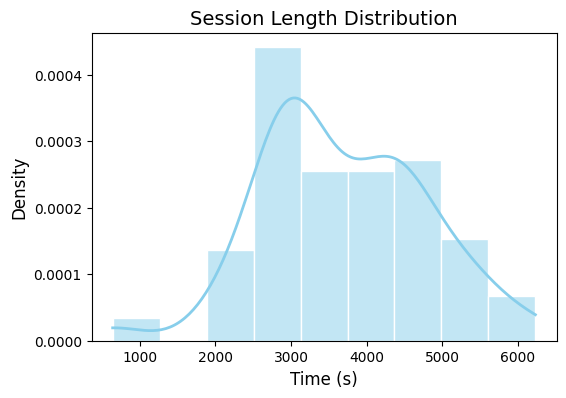

In [7]:
plt.figure(figsize=(6, 4))
ax = sns.histplot(
    data=sessions_all['length'],
    kde=True,          # Adds KDE trend line
    stat="density",    # Normalizes histogram to match KDE scale
    bins="auto",       # Auto-selects bin size (or set manually, e.g., bins=30)
    color="skyblue",   # Histogram color
    edgecolor="white", # Edge color for bars
    line_kws={"color": "red", "lw": 2}  # KDE line style
)

# Labels & title
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Session Length Distribution', fontsize=14)

In [8]:
sessions_vetted = sessions_all.loc[
    (sessions_all['num_units'] >= 1) &  # Not quiet
    (sessions_all['length'] >= 1500)    # Not short
]

In [9]:
sessions_vetted.to_csv(os.path.join(data_dir, 'sessions_vetted.csv'))

# generate units log

In [10]:
sessions_vetted = pd.read_csv(os.path.join(data_dir, 'sessions_vetted.csv'), index_col=0).sort_values('id')

In [11]:
sessions_vetted

,date,mouse,insertion_number,region,potential problems,sorting notes,First_X_Column,datetime,paramset_idx,num_units,unit_ids,id,length,num_trials,num_missed,wait_length_mean
0,2024-07-13,RZ034,1,str,NaN,should be all good now,Done,2024-07-13 12:58:26,101,47,"[7, 8, 13, 14, 16, 19, 20, 26, 34, 43, 44, 50,...",RZ034_2024-07-13_str,2443.503482,328,0,3.317166
1,2024-07-14,RZ034,1,str,NaN,NaN,Done,2024-07-14 12:52:46,101,31,"[2, 4, 10, 17, 23, 25, 35, 40, 44, 48, 67, 71,...",RZ034_2024-07-14_str,2832.875992,408,0,2.804475
3,2024-07-12,RZ036,1,str,NaN,NaN,Done,2024-07-12 12:50:31,101,45,"[2, 3, 5, 9, 10, 12, 16, 18, 19, 20, 26, 27, 2...",RZ036_2024-07-12_str,3274.883860,299,3,6.628682
2,2024-07-12,RZ036,0,v1,NaN,NaN,Done,2024-07-12 12:50:31,101,15,"[2, 6, 7, 9, 11, 13, 17, 19, 20, 22, 24, 28, 3...",RZ036_2024-07-12_v1,3274.883860,299,3,6.628682
4,2024-07-13,RZ036,1,str,NaN,NaN,Done,2024-07-13 14:29:03,101,30,"[3, 4, 17, 27, 36, 38, 43, 48, 51, 52, 72, 73,...",RZ036_2024-07-13_str,4400.303239,295,15,10.838219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2025-02-21,RZ065,1,str,NaN,NaN,Done,2025-02-21 11:15:15,101,19,"[8, 11, 12, 13, 14, 16, 17, 20, 61, 111, 122, ...",RZ065_2025-02-21_str,3731.853914,302,0,3.075755
90,2025-02-21,RZ065,0,v1,NaN,"no bug, new phy",Done,2025-02-21 11:15:15,101,27,"[6, 8, 12, 33, 37, 39, 54, 56, 67, 68, 80, 81,...",RZ065_2025-02-21_v1,3731.853914,302,0,3.075755
92,2025-02-22,RZ065,1,str,NaN,NaN,Done,2025-02-22 13:03:06,101,162,"[0, 2, 6, 11, 15, 17, 18, 21, 22, 23, 38, 39, ...",RZ065_2025-02-22_str,5265.110723,365,8,4.910904
93,2025-02-13,RZ070,1,str,NaN,NaN,Done,2025-02-13 11:40:15,101,2,"[0, 14]",RZ070_2025-02-13_str,2115.197888,327,0,2.087204


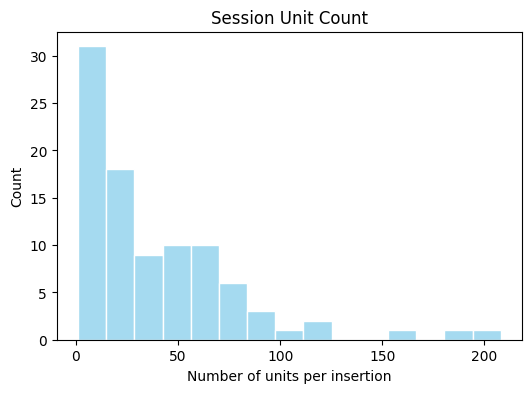

In [12]:
plt.figure(figsize=(6, 4))
ax = sns.histplot(
    data=sessions_vetted['num_units'],  # Normalizes histogram to match KDE scale
    bins=15,       # Auto-selects bin size (or set manually, e.g., bins=30)
    color="skyblue",   # Histogram color
    edgecolor="white", # Edge color for bars
    line_kws={"color": "red", "lw": 2}  # KDE line style
)

# Labels & title
plt.xlabel('Number of units per insertion')
plt.ylabel('Count')
plt.title('Session Unit Count')
plt.savefig(os.path.join(data_dir, "session_unit_count.png"))# no time to finish this 

In [13]:
def generate_units_all(sessions_vetted, pickle_dir):
    unit_info_list = []
    for _, session_info in sessions_vetted.iterrows():
        session_id = session_info['id']
        unit_ids = ast.literal_eval(sessions_all.iloc[0]['unit_ids'])
        _, _, units = utils.get_session_data(session_id, pickle_dir)
        for id, spikes in zip(unit_ids, units):
            unit_id = f"{session_id}_unit-{id}"
            spiked_trials = spikes.trial_id.nunique()
            percent_trials_w_spikes = spiked_trials/session_info['num_trials']
            session_fr = len(spikes)/session_info['length']
            unit_info_dict = {
                'session_id': session_id,
                'id': id,
                'unit_id': unit_id,
                'region': session_info['region'],
                'percent_trials_w_spikes': percent_trials_w_spikes,
                'session_fr': session_fr
            }
            unit_info_list.append(unit_info_dict)
    units_all = pd.DataFrame(unit_info_list)
    return units_all

In [14]:
units_all = generate_units_all(sessions_vetted, pickle_dir)
units_all.to_csv(os.path.join(data_dir, 'units_all.csv'))
print(f"{len(units_all)} units")

2507 units


In [15]:
units_all = pd.read_csv(os.path.join(data_dir, 'units_all.csv'), index_col=0)

In [16]:
units_all[units_all['region']=='v1']

,session_id,id,unit_id,region,percent_trials_w_spikes,session_fr
123,RZ036_2024-07-12_v1,7,RZ036_2024-07-12_v1_unit-7,v1,0.879599,0.598189
124,RZ036_2024-07-12_v1,8,RZ036_2024-07-12_v1_unit-8,v1,1.000000,4.674364
125,RZ036_2024-07-12_v1,13,RZ036_2024-07-12_v1_unit-13,v1,0.983278,2.682843
126,RZ036_2024-07-12_v1,14,RZ036_2024-07-12_v1_unit-14,v1,1.000000,20.037657
127,RZ036_2024-07-12_v1,16,RZ036_2024-07-12_v1_unit-16,v1,0.782609,0.477574
...,...,...,...,...,...,...
2452,RZ065_2025-02-21_v1,117,RZ065_2025-02-21_v1_unit-117,v1,0.966887,1.062743
2453,RZ065_2025-02-21_v1,119,RZ065_2025-02-21_v1_unit-119,v1,0.966887,1.522836
2454,RZ065_2025-02-21_v1,121,RZ065_2025-02-21_v1_unit-121,v1,1.000000,13.483111
2455,RZ065_2025-02-21_v1,126,RZ065_2025-02-21_v1_unit-126,v1,0.887417,0.445087


Text(0.5, 1.0, 'Percent Trials with Spikes Distribution')

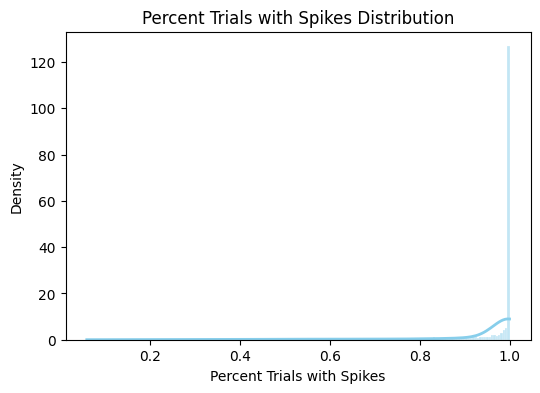

In [17]:
plt.figure(figsize=(6, 4))
ax = sns.histplot(
    data=units_all['percent_trials_w_spikes'],
    kde=True,          # Adds KDE trend line
    stat="density",    # Normalizes histogram to match KDE scale
    bins="auto",       # Auto-selects bin size (or set manually, e.g., bins=30)
    color="skyblue",   # Histogram color
    edgecolor="white", # Edge color for bars
    line_kws={"color": "red", "lw": 2}  # KDE line style
)

# Labels & title
plt.xlabel('Percent Trials with Spikes')
plt.ylabel('Density')
plt.title('Percent Trials with Spikes Distribution')

Text(0.5, 1.0, 'Session Firing Rate Distribution')

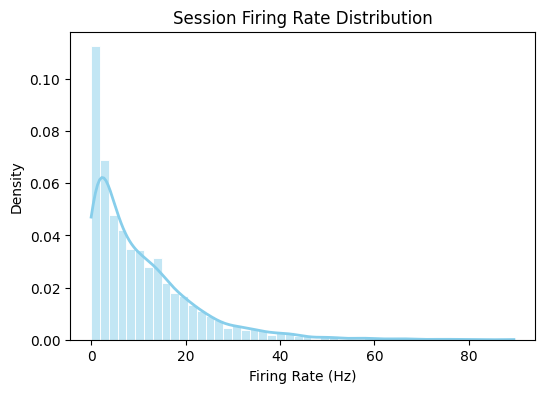

In [18]:
plt.figure(figsize=(6, 4))
ax = sns.histplot(
    data=units_all['session_fr'],
    kde=True,          # Adds KDE trend line
    stat="density",    # Normalizes histogram to match KDE scale
    bins="auto",       # Auto-selects bin size (or set manually, e.g., bins=30)
    color="skyblue",   # Histogram color
    edgecolor="white", # Edge color for bars
    line_kws={"color": "red", "lw": 2}  # KDE line style
)

# Labels & title
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Density')
plt.title('Session Firing Rate Distribution')

In [19]:
units_vetted = units_all.loc[units_all['percent_trials_w_spikes'] >= 0.8]
units_vetted.to_csv(os.path.join(data_dir, 'units_vetted.csv'))

print(f"{len(units_vetted)} units")

2189 units
